In [70]:
import pickle
from PIL import ImageOps
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import tensorflow as tf

In [67]:
# Entrer le path de l'image et Exécuter
Image = 'Images/n02110185-Siberian_husky/n02110185_2736.jpg'

In [3]:
infile = open("process.p", "rb")
process = pickle.load(infile)
infile.close()

In [21]:
model = load_model('inceptionv3_bis_model.h5')

In [62]:
class Predicteur_Races:
    def __init__(self, Encoder, Predicteur):
        self.Encoder = Encoder
        self.Predicteur = Predicteur

    def predict(self, Images):

        img = load_img(Images, target_size=(224, 224))
        img = ImageOps.equalize(img, mask=None)
        img_array = np.array(img)

        return self.predict_array(img_array)

    def predict_array(self, array):
        img_array = cv.fastNlMeansDenoisingColored(src=array, dst=None)

        x = img_array.reshape((-1, 224, 224, 3))
        x = tf.keras.applications.inception_v3.preprocess_input(x)

        Prediction = self.Predicteur.predict(x)
        Prediction = np.argmax(Prediction, axis=1)
        Prediction = self.Encoder.inverse_transform(Prediction)

        return Prediction[0]

In [63]:
predicteur = Predicteur_Races(process["Encoder"], model)

In [68]:
predicteur.predict(Image)

'Siberian_husky'

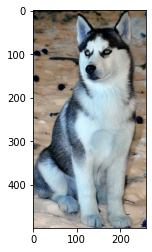

In [75]:
dogs = cv.imread('Images/n02110185-Siberian_husky/n02110185_2736.jpg')
plt.imshow(dogs)